In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show that there are 1797 images (8 by 8 images for the dimensionalily of 64)
print('Image data shape', digits.data.shape)

# Print to show that there are 1797 labels (integers from 0-9)
print('Label data shape', digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


In [3]:
digits.data[7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

In [4]:
digits.target[7]

7

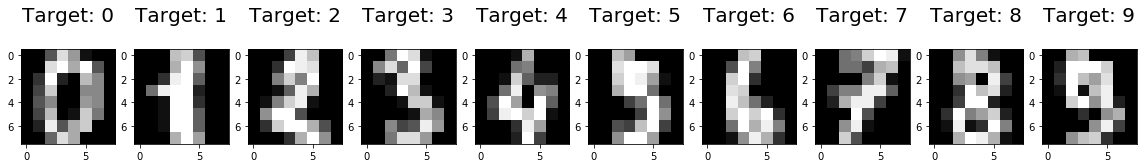

In [5]:
# Plotting the data
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Target: %i\n' % label, fontsize=20)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(C=10.0, solver='saga', random_state=12, max_iter=2000, tol=0.0001) #, multi_class='auto')

In [9]:
clf.fit(X_train, y_train)

C:\Users\gkumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# Predict for one observation (image) at Once
# Returns Numpy array
clf.predict(X_test[0].reshape(1, -1))

array([2])

In [11]:
clf.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [12]:
predictions = clf.predict(X_test)

In [13]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 8, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [14]:
# Use score mothod to get the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

0.9466666666666667


In [15]:
import seaborn as sns
from sklearn import metrics

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.88      0.86      0.87        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.88      0.90      0.89        48
          9       0.96      0.91      0.93        47

avg / total       0.95      0.95      0.95       450



In [17]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  2  0  4  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  2 43]]


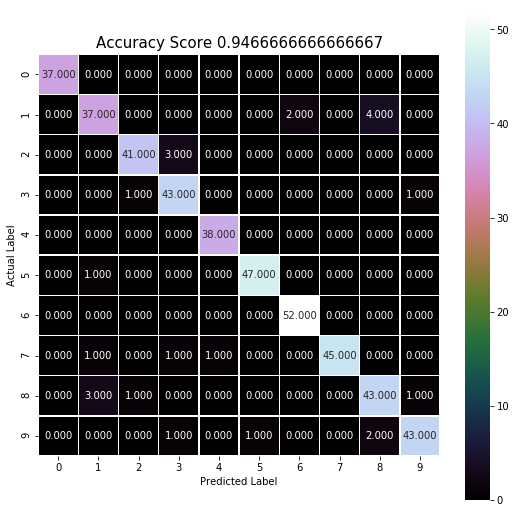

In [18]:
# Drawing a heatmap for confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='cubehelix') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score {0}'.format(score)
plt.title(all_sample_title, size = 15)
#plt.savefig()
plt.show()

In [19]:
#!conda install scikit-learn=0.24.2

In [20]:
import sklearn
sklearn.__version__

'0.19.1'